# PART 2


We did not manage to have satisfactory results in this part so we are not going to use it for our Notebook, you can find the process we used in the pdf.

In [40]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# We import dblp from google drive
id='1bfZzGpT5jQwYuLHfdgPO_4JSLyPsIVBR'

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('globalterrorismdb_0919dist.xlsx')  
df_terrorism = pd.read_excel('globalterrorismdb_0919dist.xlsx',index_col='eventid')

In [43]:
df_terrorism.head()

,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
eventid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [0]:
df_terrorism.to_csv('terrorism_df.csv')

In [45]:
print('Cardinality: ', len(df_terrorism))
print('Degree: ', len(df_terrorism.columns))

Cardinality:  191464
Degree:  134


In [46]:
df_terrorism.columns.tolist()

['iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 'claimed',
 

In [0]:
df_europe = df_terrorism[df_terrorism.region_txt.str.contains('Europe')]

In [0]:
df_year2015=df_europe.loc[(df_europe['iyear'])>2015]

In [0]:
df_year2015=df_year2015.loc[(df_year2015['nkill'])>20]

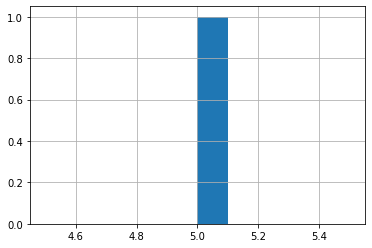

In [50]:
df_year2015[df_year2015.iyear==2017].imonth.hist()

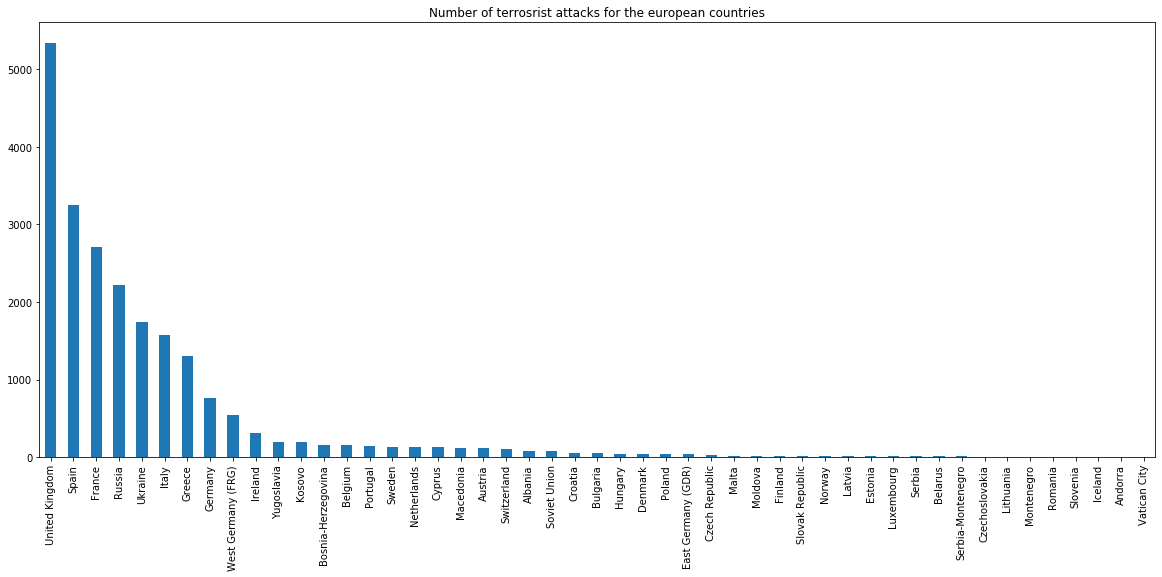

In [51]:
plt.figure(figsize=(20,8))
df_europe.country_txt.value_counts().plot(kind='bar')
plt.title('Number of terrosrist attacks for the european countries')
plt.show()

In [0]:
top20 = df_europe.country_txt.value_counts().index.tolist()[:20]

In [0]:
df_top20 = df_europe[df_europe.country_txt.str.contains('|'.join(top20))]
print('The top8 countries represent {:.2f} % of the total number of attacks'.format(len(df_top20)/len(df_europe)*100))

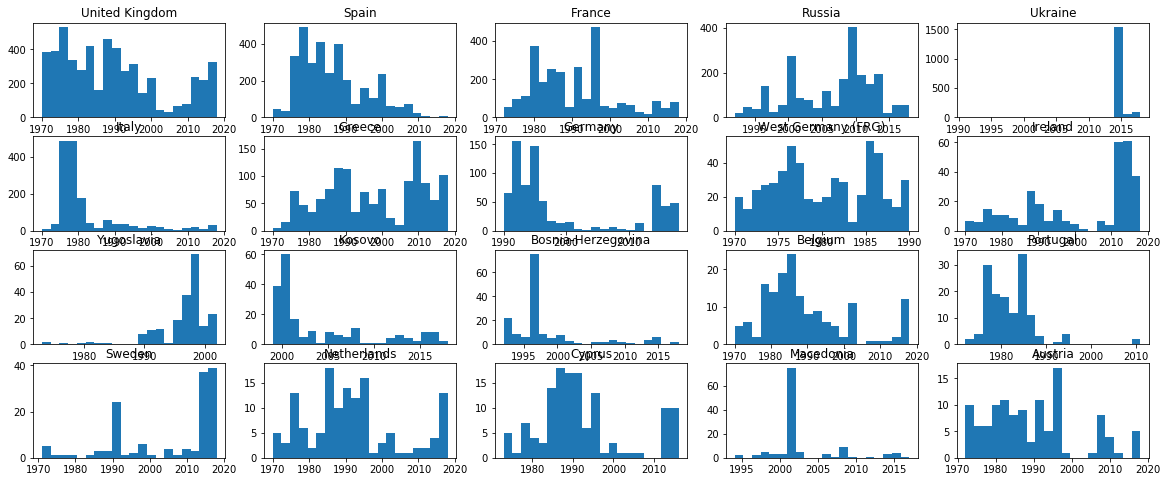

In [54]:
fig, axs = plt.subplots(4,5, figsize=(20, 8), facecolor='w', edgecolor='k')

for ax, country in zip(axs.ravel(),top20):
  df_top20[df_top20.country_txt == country].iyear.hist(ax=ax, grid=False,bins=20)
  ax.set_title(country)

In [55]:
df_top20.gname.value_counts().index.tolist()[:30]

['Unknown',
 'Irish Republican Army (IRA)',
 'Basque Fatherland and Freedom (ETA)',
 'Corsican National Liberation Front (FLNC)',
 "Donetsk People's Republic",
 'Protestant extremists',
 'Chechen Rebels',
 'Ulster Volunteer Force (UVF)',
 'Ulster Freedom Fighters (UFF)',
 'Neo-Nazi extremists',
 'Red Brigades',
 'First of October Antifascist Resistance Group (GRAPO)',
 "Luhansk People's Republic",
 "Kurdistan Workers' Party (PKK)",
 'Corsican National Liberation Front- Historic Channel',
 'Irish National Liberation Army (INLA)',
 'November 17 Revolutionary Organization (N17RO)',
 'Dissident Republicans',
 'Armenian Secret Army for the Liberation of Armenia',
 'Anarchists',
 'Irish Republican Extremists',
 'Separatists',
 "Revolutionary People's Struggle (ELA)",
 'Resistenza',
 'Red Army Faction (RAF)',
 'Corsican Separatists',
 'Terra Lliure',
 'Revolutionary Cells',
 'Prima Linea',
 'Kosovo Liberation Army (KLA)']

In [0]:
df_top20=df_top20.set_index("gname")

In [0]:
remloc2=["Unknown","Irish Republican Army (IRA)","Irish National Liberation Army (INLA)","Basque Fatherland and Freedom (ETA)","Corsican National Liberation Front (FLNC)","Kosovo Liberation Army (KLA)","Corsican National Liberation Front- Historic Channel",
        "Corsican National Liberation Front- Historic Channel","Irish National Liberation Army (INLA)"]
remloc=["Unknown"]

In [0]:
df_top20 = df_top20.drop(remloc, axis=0)

In [0]:
df_top20=df_top20.reset_index()

In [0]:
grp=df_top20.gname.value_counts().index.tolist()[:30]

In [0]:
df_fr=df_top20[df_top20.country_txt == 'France']

In [0]:
top30 = df_top20.provstate.value_counts().index.tolist()[:30]

In [0]:
df_europe30 = df_top20[df_top20.provstate.str.contains('|'.join(top30))]

In [64]:
df_europe30.gname.value_counts().index.tolist()

['Irish Republican Army (IRA)',
 'Basque Fatherland and Freedom (ETA)',
 "Donetsk People's Republic",
 'Corsican National Liberation Front (FLNC)',
 'Protestant extremists',
 'Chechen Rebels',
 'Ulster Volunteer Force (UVF)',
 'Ulster Freedom Fighters (UFF)',
 "Luhansk People's Republic",
 'First of October Antifascist Resistance Group (GRAPO)',
 'Red Brigades',
 'Corsican National Liberation Front- Historic Channel',
 'Irish National Liberation Army (INLA)',
 'November 17 Revolutionary Organization (N17RO)',
 'Dissident Republicans',
 "Kurdistan Workers' Party (PKK)",
 'Irish Republican Extremists',
 'Armenian Secret Army for the Liberation of Armenia',
 'Separatists',
 "Revolutionary People's Struggle (ELA)",
 'Resistenza',
 'Anarchists',
 'Neo-Nazi extremists',
 'Terra Lliure',
 'Iparretarrak (IK)',
 'Conspiracy of Cells of Fire',
 'Action Directe',
 'Oglaigh na hEireann',
 'Corsican Separatists',
 'Revolutionary Cells',
 'The New Irish Republican Army',
 "Free Galician People's Gue

In [0]:
grp2=df_europe30.gname.value_counts().index.tolist()

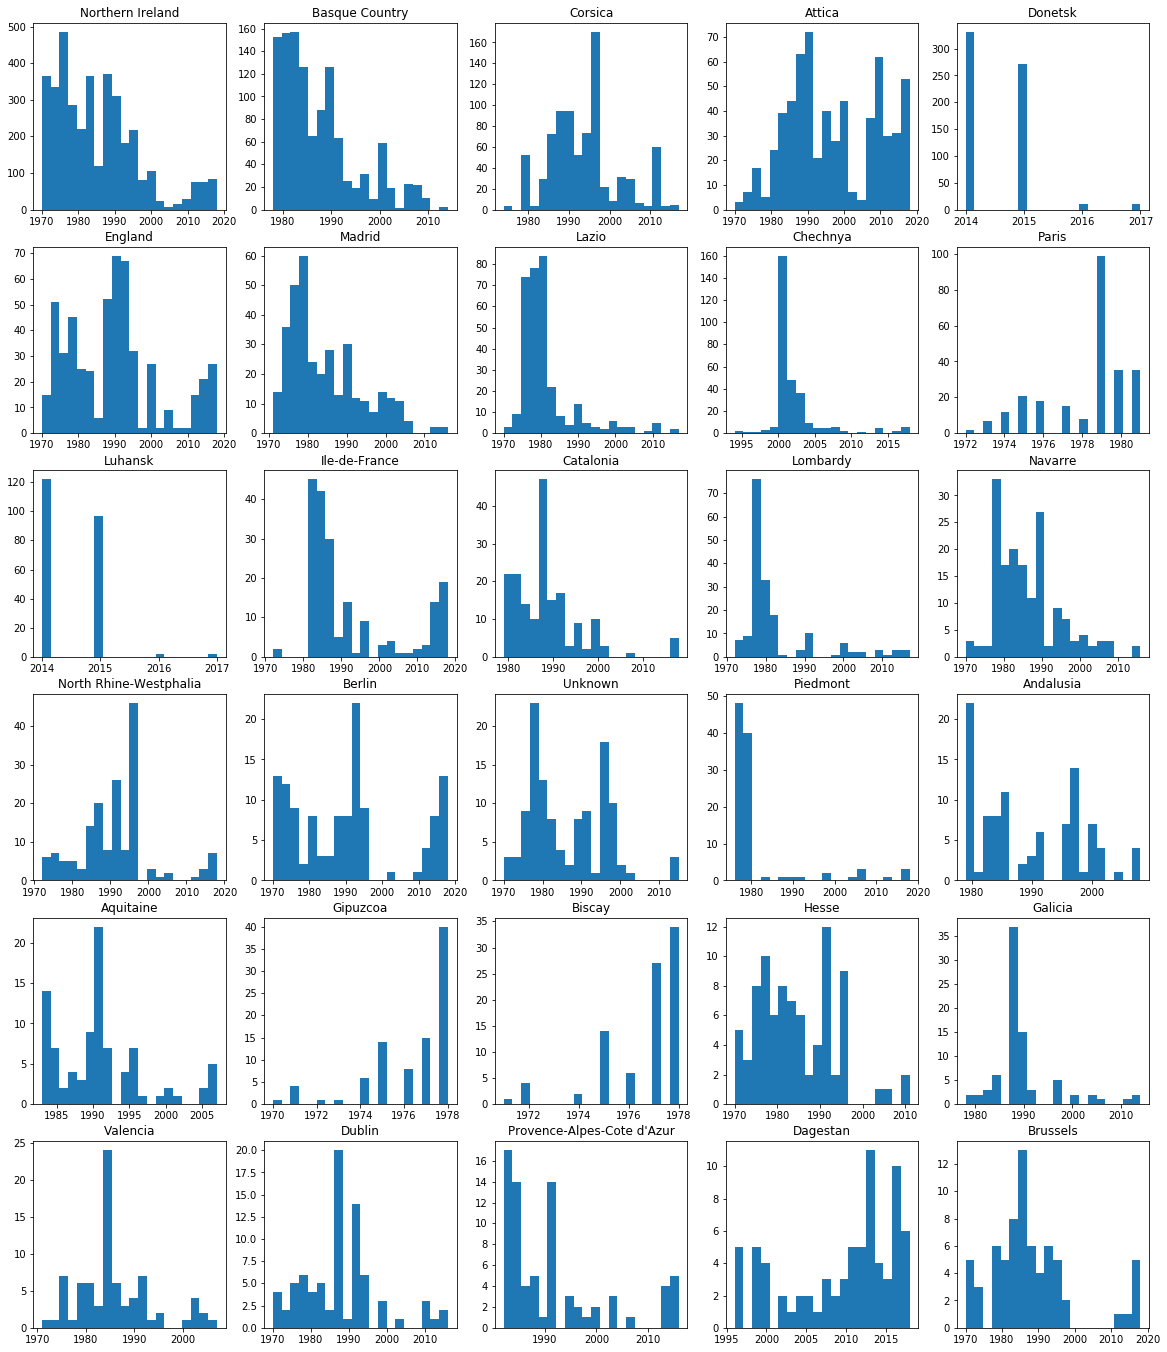

In [66]:
fig, axs = plt.subplots(6,5, figsize=(20, 24), facecolor='w', edgecolor='k')

for ax ,prov in zip(axs.ravel(),top30):
  df_europe30[df_europe30.provstate == prov].iyear.hist(ax=ax,grid=False,bins=20)
  ax.set_title(prov)

In [67]:
df_grp = df_europe30[df_europe30.gname.str.contains('|'.join(grp2))]

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [0]:
#df_grp=df_grp.loc[(df_grp['nkill']+df_grp['nwound'])>10]
grp3=df_grp.gname.value_counts().index.tolist()

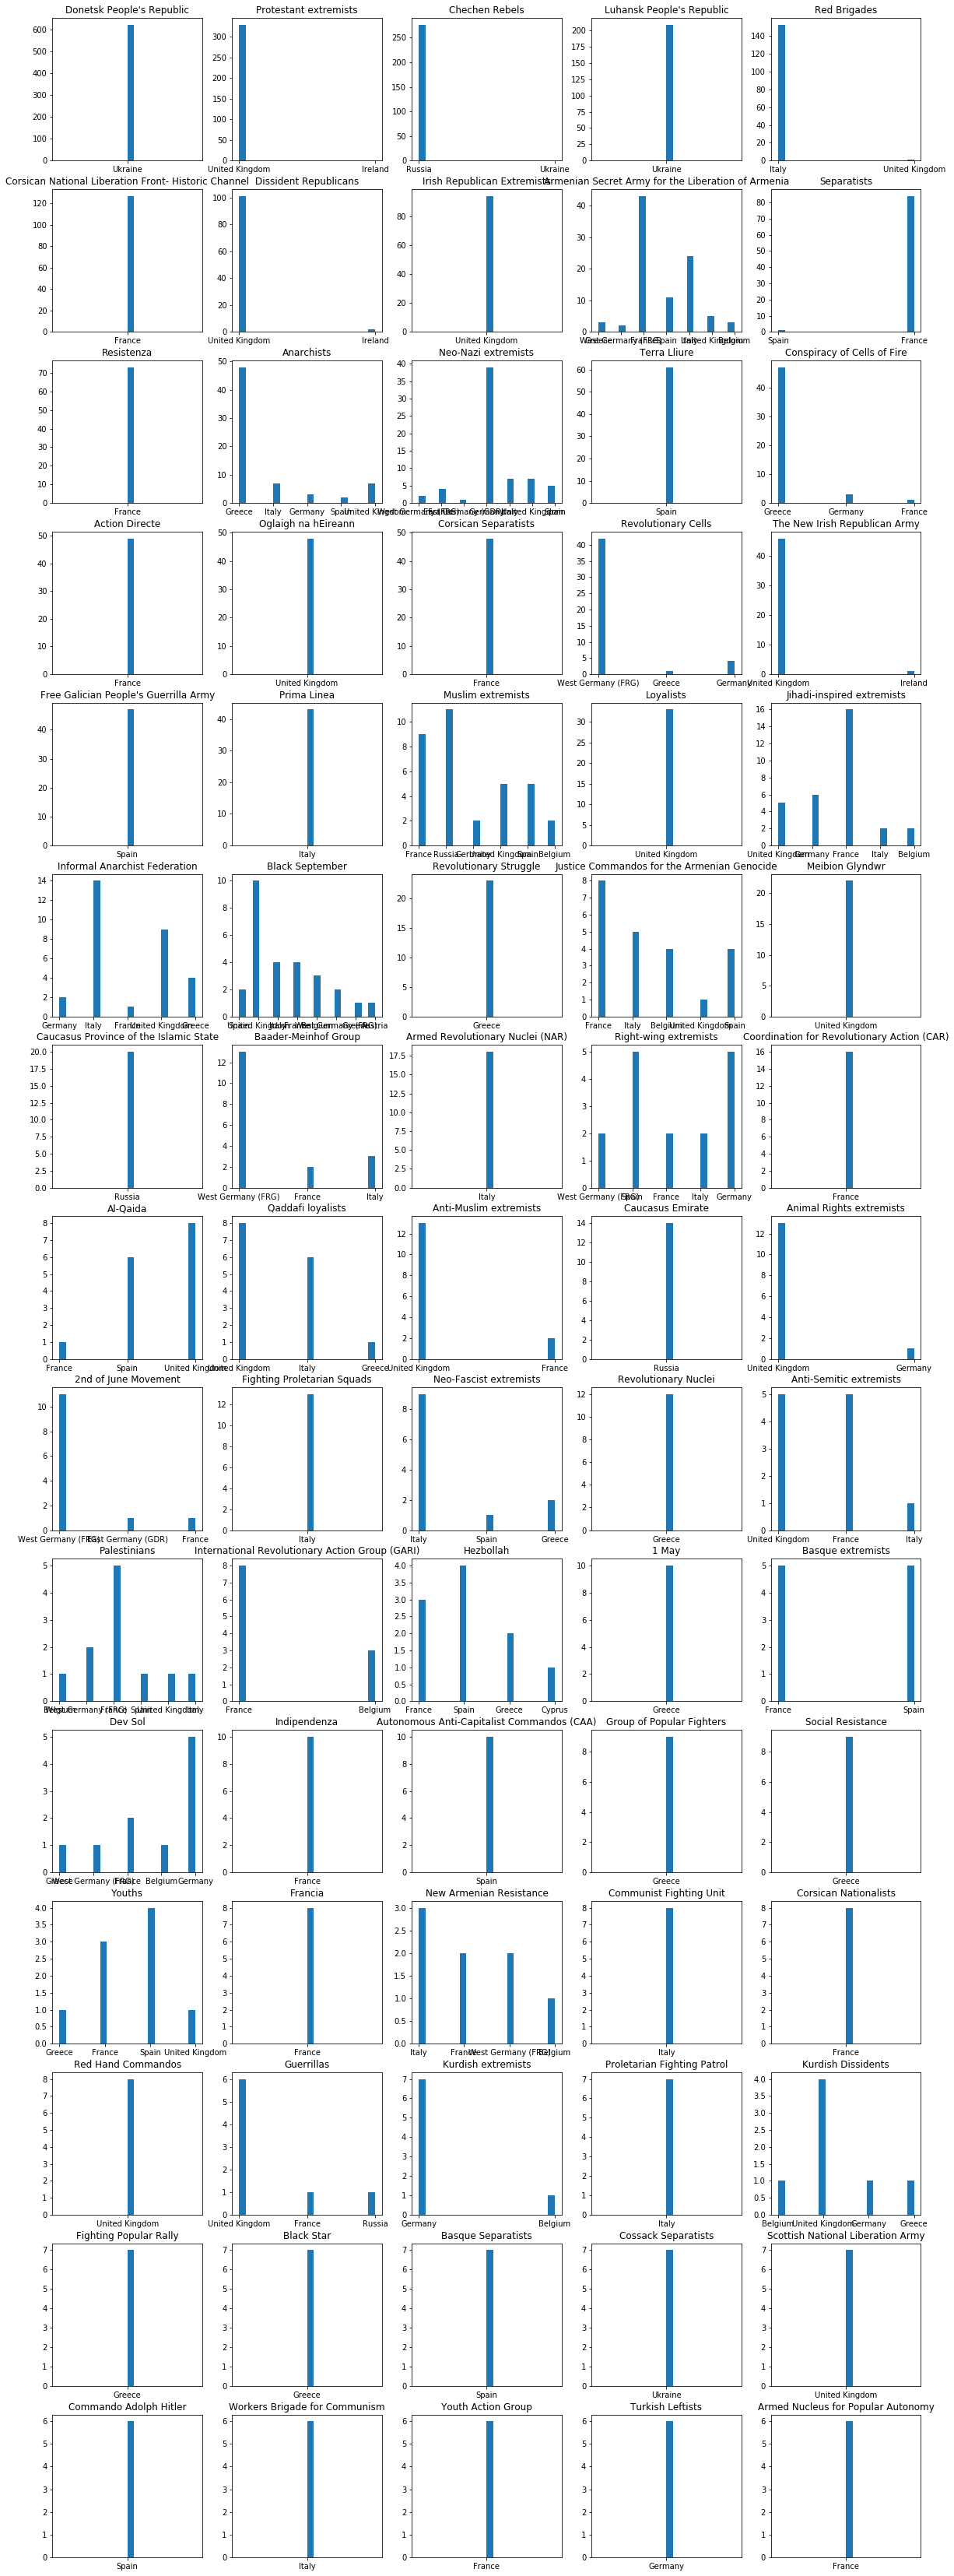

In [69]:
fig, axs = plt.subplots(15,5, figsize=(20, 60), facecolor='w', edgecolor='k')

for ax ,gr in zip(axs.ravel(),grp3):
  df_grp[df_grp.gname == gr].country_txt.hist(ax=ax,grid=False,bins=20)
  ax.set_title(gr)

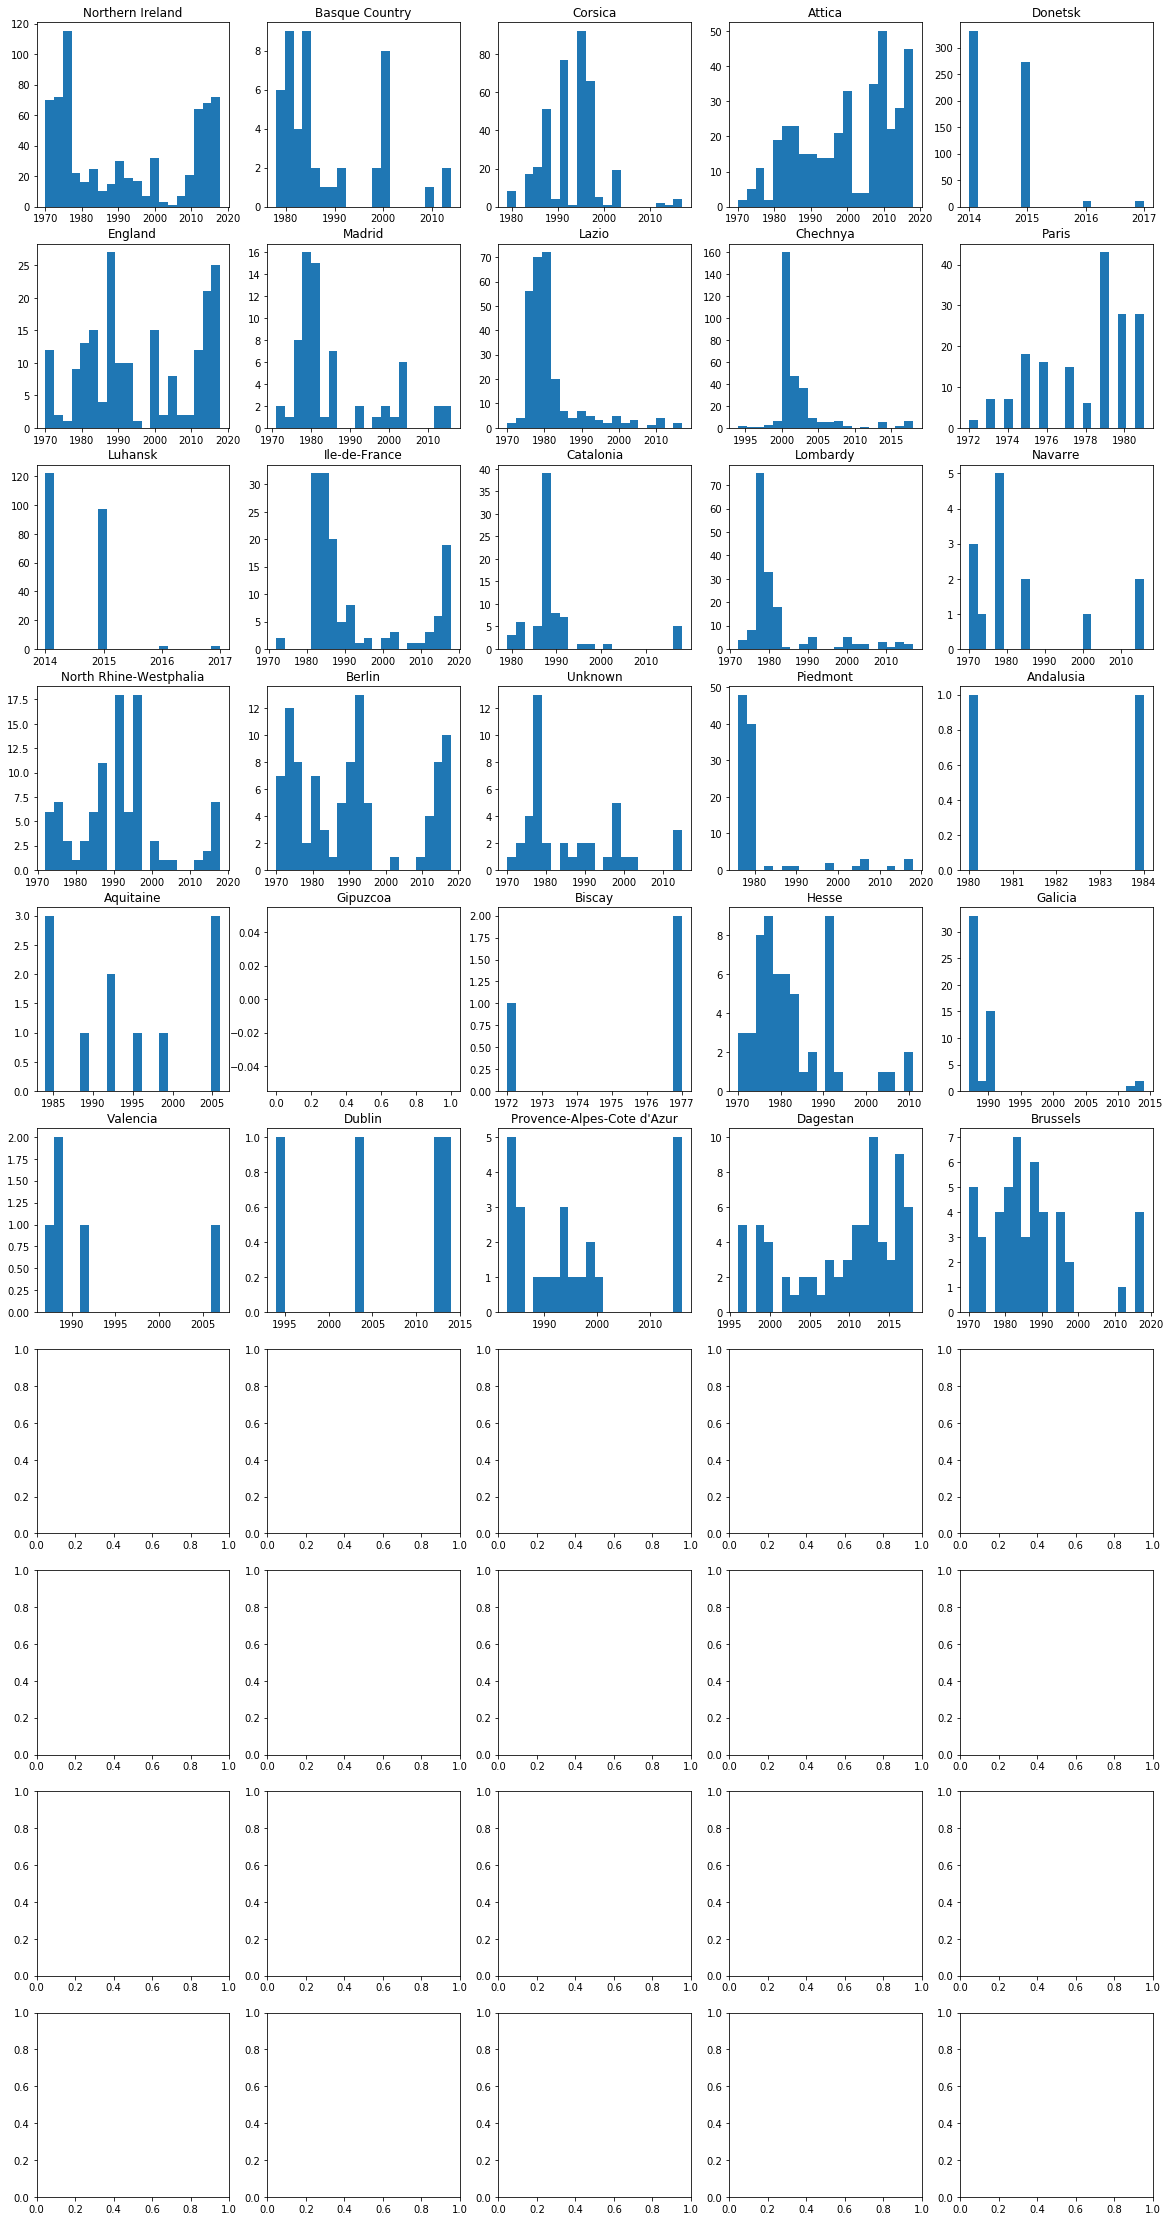

In [70]:
fig, axs = plt.subplots(10,5, figsize=(20, 40), facecolor='w', edgecolor='k')

for ax ,prov in zip(axs.ravel(),top30):
  df_grp[df_grp.provstate == prov].iyear.hist(ax=ax,grid=False,bins=20)
  ax.set_title(prov)

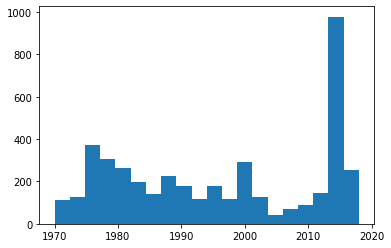

In [71]:
 df_grp.iyear.hist(grid=False,bins=20)

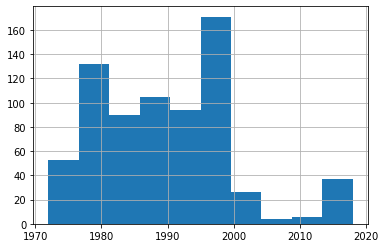

In [72]:
df_grp[df_grp.country_txt=='France'].iyear.hist()

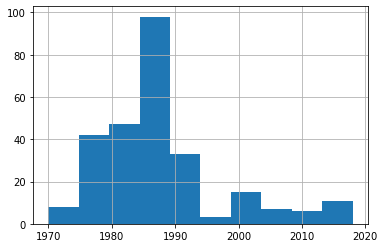

In [73]:
df_grp[df_grp.country_txt=='Spain'].iyear.hist()

In [74]:
gnames = []
for gname, group in df_grp.groupby('gname'):
  if group.country_txt.nunique() > 3:
    gnames.append(gname)

df_grp = df_grp[df_grp.gname.isin(gnames)]
df_grp.head()

,gname,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
79,Black September,1971,8,24,NaN,0,NaT,185,Spain,8,Western Europe,Madrid,Madrid,40.465595,-3.696263,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),NaN,Jordanian Alia Airliner,...,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,3.0,Minor (likely < $1 million),60000.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,1,1,1,1,NaN
142,Black September,1971,12,15,NaN,0,NaT,603,United Kingdom,8,Western Europe,England,London,51.504387,-0.140041,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,0,0,1,Assassination,NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Jordanian Govt,Jordanian Ambassador,...,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,1,1,1,1,NaN
346,Black September,1972,8,16,NaN,0,NaT,98,Italy,8,Western Europe,Lazio,Rome,41.890961,12.490069,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),NaN,el al acft,...,NaN,NaN,Explosive,0.0,NaN,NaN,4.0,NaN,NaN,1,3.0,Minor (likely < $1 million),50000.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,1,1,1,1,NaN
376,Palestinians,1972,9,11,NaN,0,NaT,21,Belgium,8,Western Europe,Brussels,Brussels,50.836426,4.367415,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,0,0,1,Assassination,NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Israili govt,Diplomat Ophir Zadok,...,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,1,0,1,1,NaN
382,Black September,1972,9,19,NaN,0,NaT,603,United Kingdom,8,Western Europe,England,London,51.504387,-0.140041,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,Israeli Ministry of Foreign Affairs,Agricultural Affairs Counselor: Dr. Ami Shachori,...,NaN,NaN,Letter bomb,1.0,0.0,0.0,1.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,1,1,1,1,"197209190001, 197209190002, 197209190003, 1972..."


In [0]:
grp4=df_grp.gname.value_counts().index.tolist()

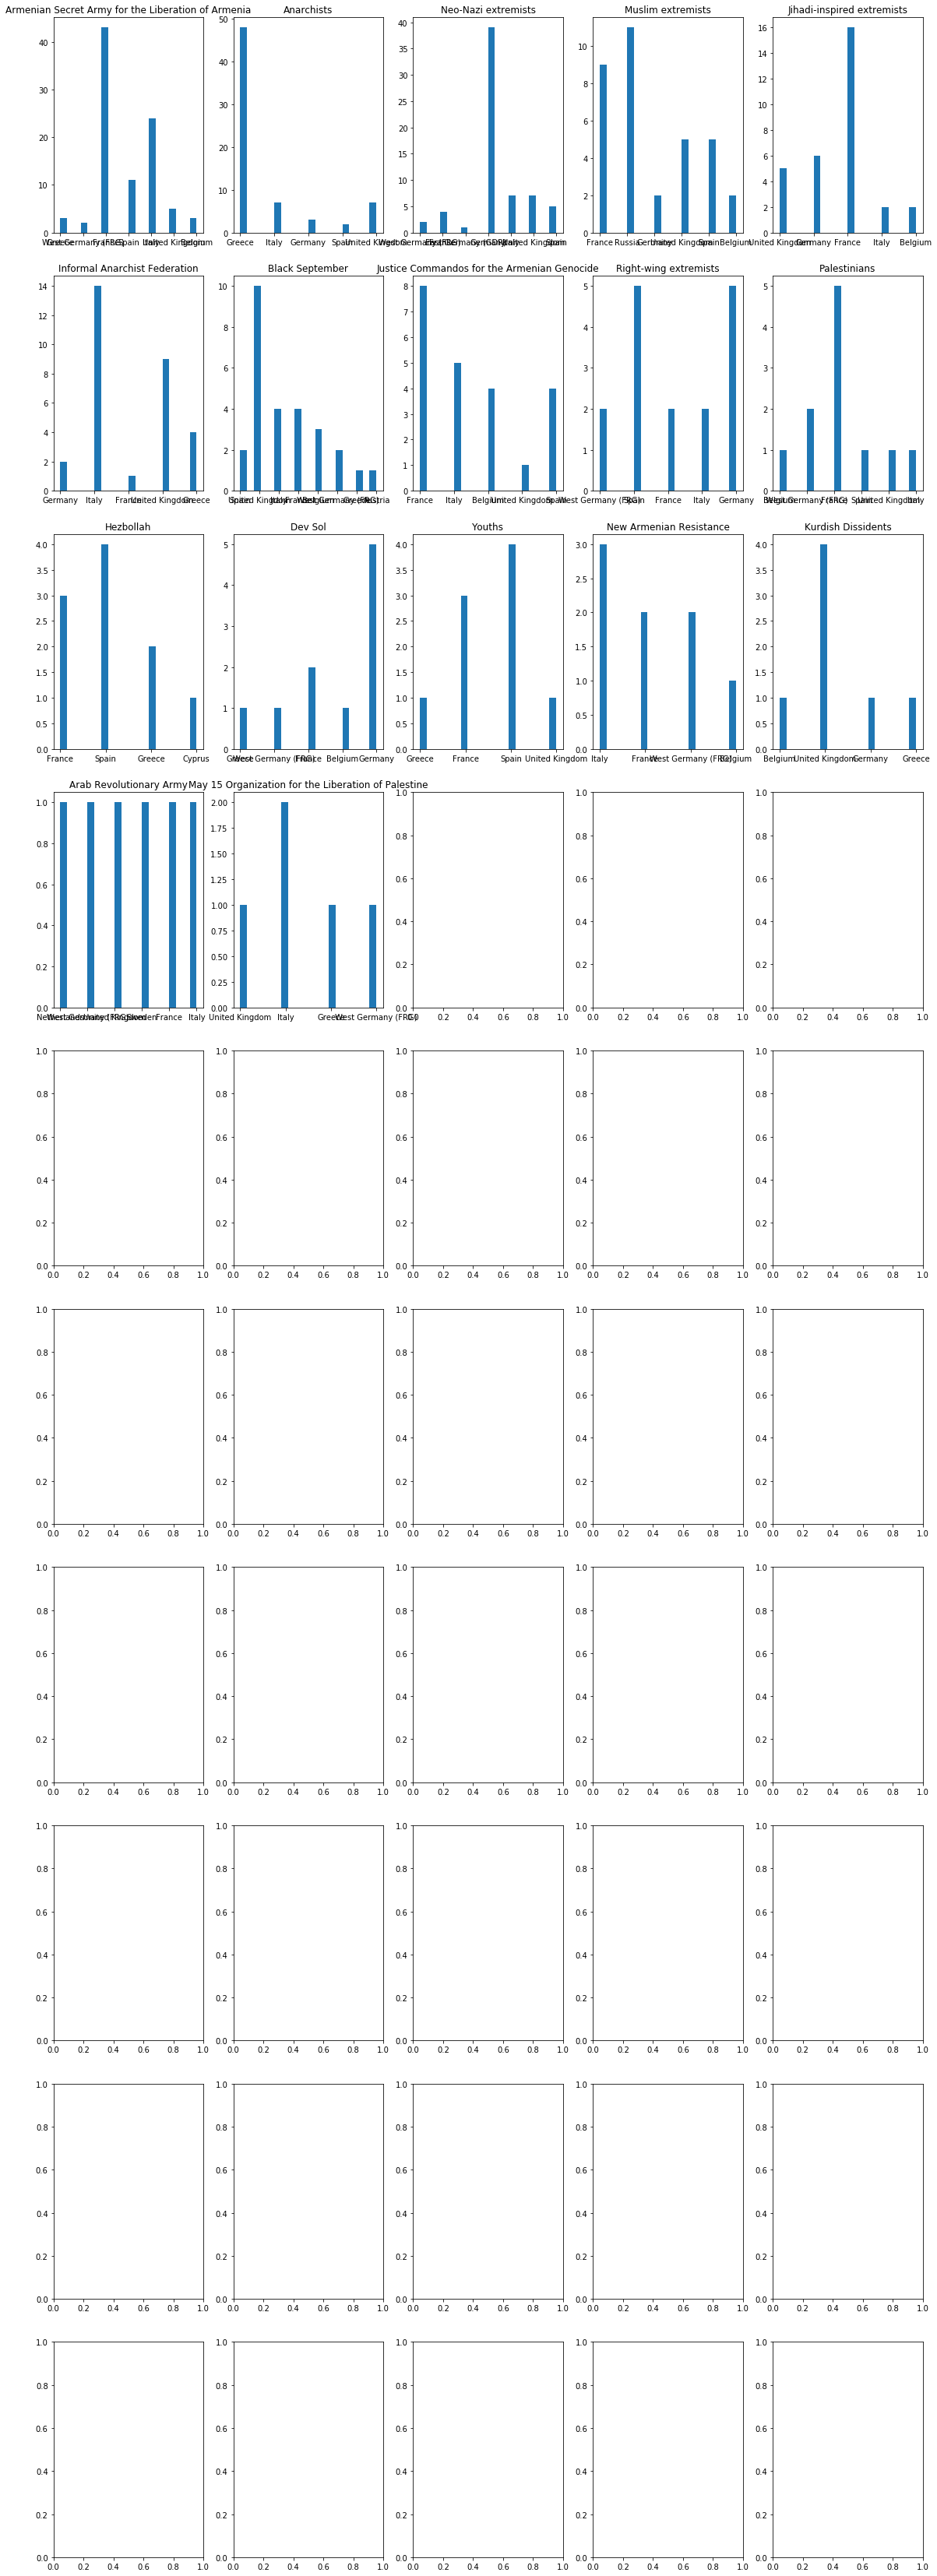

In [76]:
fig, axs = plt.subplots(10,5, figsize=(20, 60), facecolor='w', edgecolor='k')

for ax ,gr in zip(axs.ravel(),grp4):
  df_grp[df_grp.gname == gr].country_txt.hist(ax=ax,grid=False,bins=20)
  ax.set_title(gr)

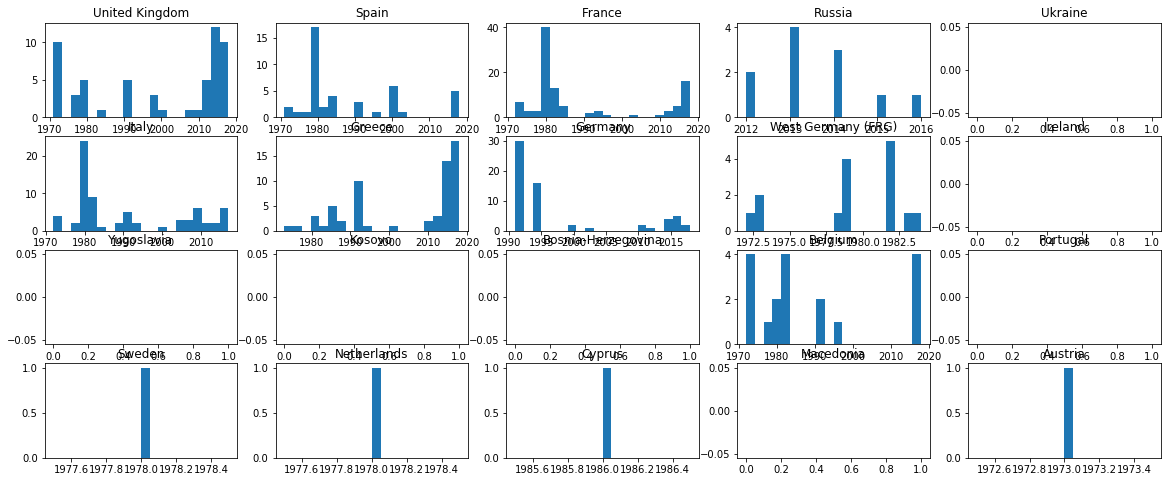

In [77]:
fig, axs = plt.subplots(4,5, figsize=(20, 8), facecolor='w', edgecolor='k')

for ax, country in zip(axs.ravel(),top20):
  df_grp[df_grp.country_txt == country].iyear.hist(ax=ax, grid=False,bins=20)
  ax.set_title(country)

In [0]:
df_tour=pd.read_csv('tourism/international-tourism-number-of-arrivals.csv')

In [79]:
df_tour.head()

,Entity,Code,Year,Unnamed: 3
0,Albania,ALB,1995,304000.0
1,Albania,ALB,1996,287000.0
2,Albania,ALB,1997,119000.0
3,Albania,ALB,1998,184000.0
4,Albania,ALB,1999,371000.0


In [0]:
df_tour.rename(columns={'Entity':'country','Unnamed: 3':'nbtour'},inplace=True)

In [81]:
df_tour.head()

,country,Code,Year,nbtour
0,Albania,ALB,1995,304000.0
1,Albania,ALB,1996,287000.0
2,Albania,ALB,1997,119000.0
3,Albania,ALB,1998,184000.0
4,Albania,ALB,1999,371000.0


In [0]:
df_tour = df_tour[df_tour.country.str.contains('|'.join(top20))]

In [83]:
df_tour

,country,Code,Year,nbtour
235,Austria,AUT,1995,17173000.0
236,Austria,AUT,1996,17090000.0
237,Austria,AUT,1997,16647000.0
238,Austria,AUT,1998,17352000.0
239,Austria,AUT,1999,17467000.0
...,...,...,...,...
4947,United Kingdom,GBR,2012,29282000.0
4948,United Kingdom,GBR,2013,31063000.0
4949,United Kingdom,GBR,2014,32613000.0
4950,United Kingdom,GBR,2015,34436000.0


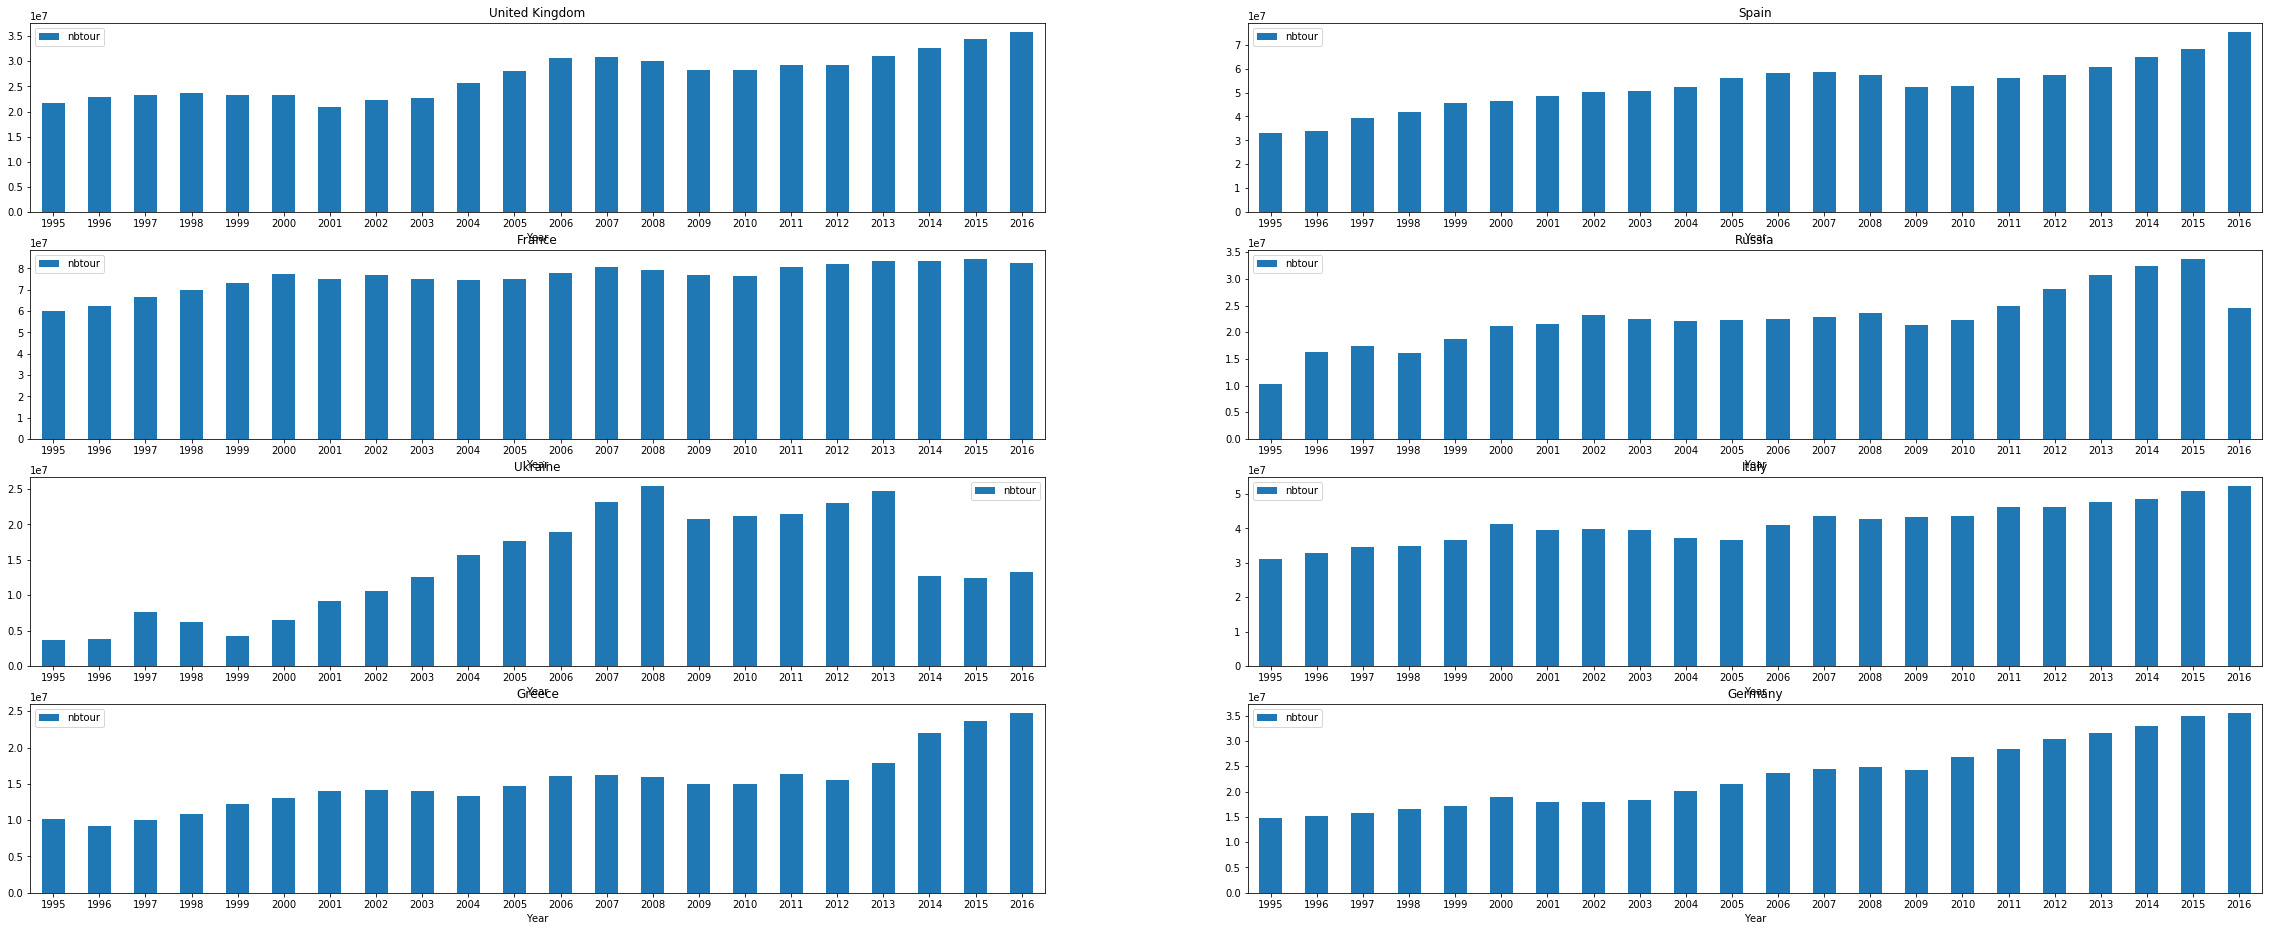

In [84]:
fig, axs = plt.subplots(4,2, figsize=(40, 16), facecolor='w', edgecolor='k')

for ax, count in zip(axs.ravel(),top20):
  df_tour[df_tour.country == count].plot.bar('Year','nbtour',rot=0,ax=ax)
  ax.set_title(count) 

In [85]:
df_grp2 = df_europe30[df_europe30.gname.str.contains('|'.join(grp2))]

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [0]:
df_grp2=df_grp2.loc[(df_grp2['nkill']+df_grp2['nwound'])>30]

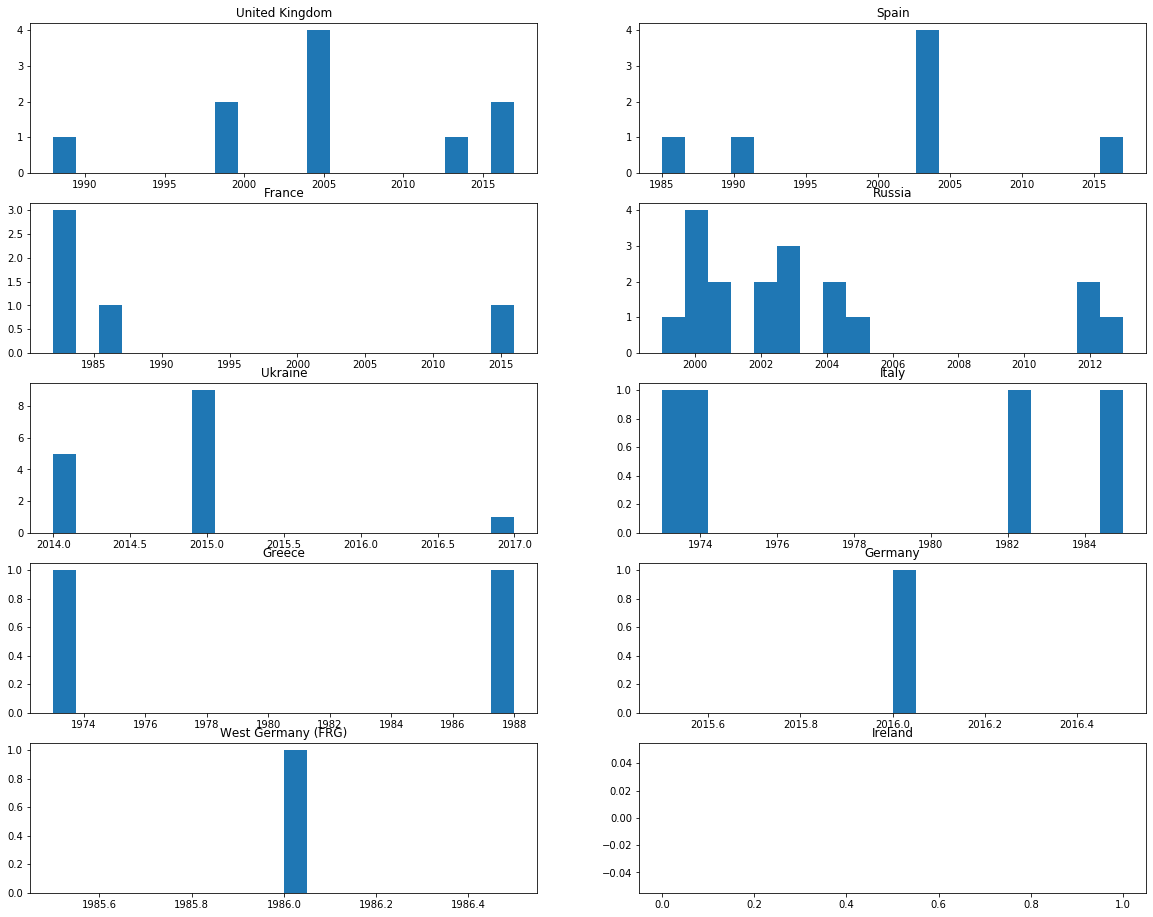

In [87]:
fig, axs = plt.subplots(5,2, figsize=(20, 16), facecolor='w', edgecolor='k')

for ax, country in zip(axs.ravel(),top20):
  df_grp2[df_grp2.country_txt == country].iyear.hist(ax=ax, grid=False,bins=20)
  ax.set_title(country)

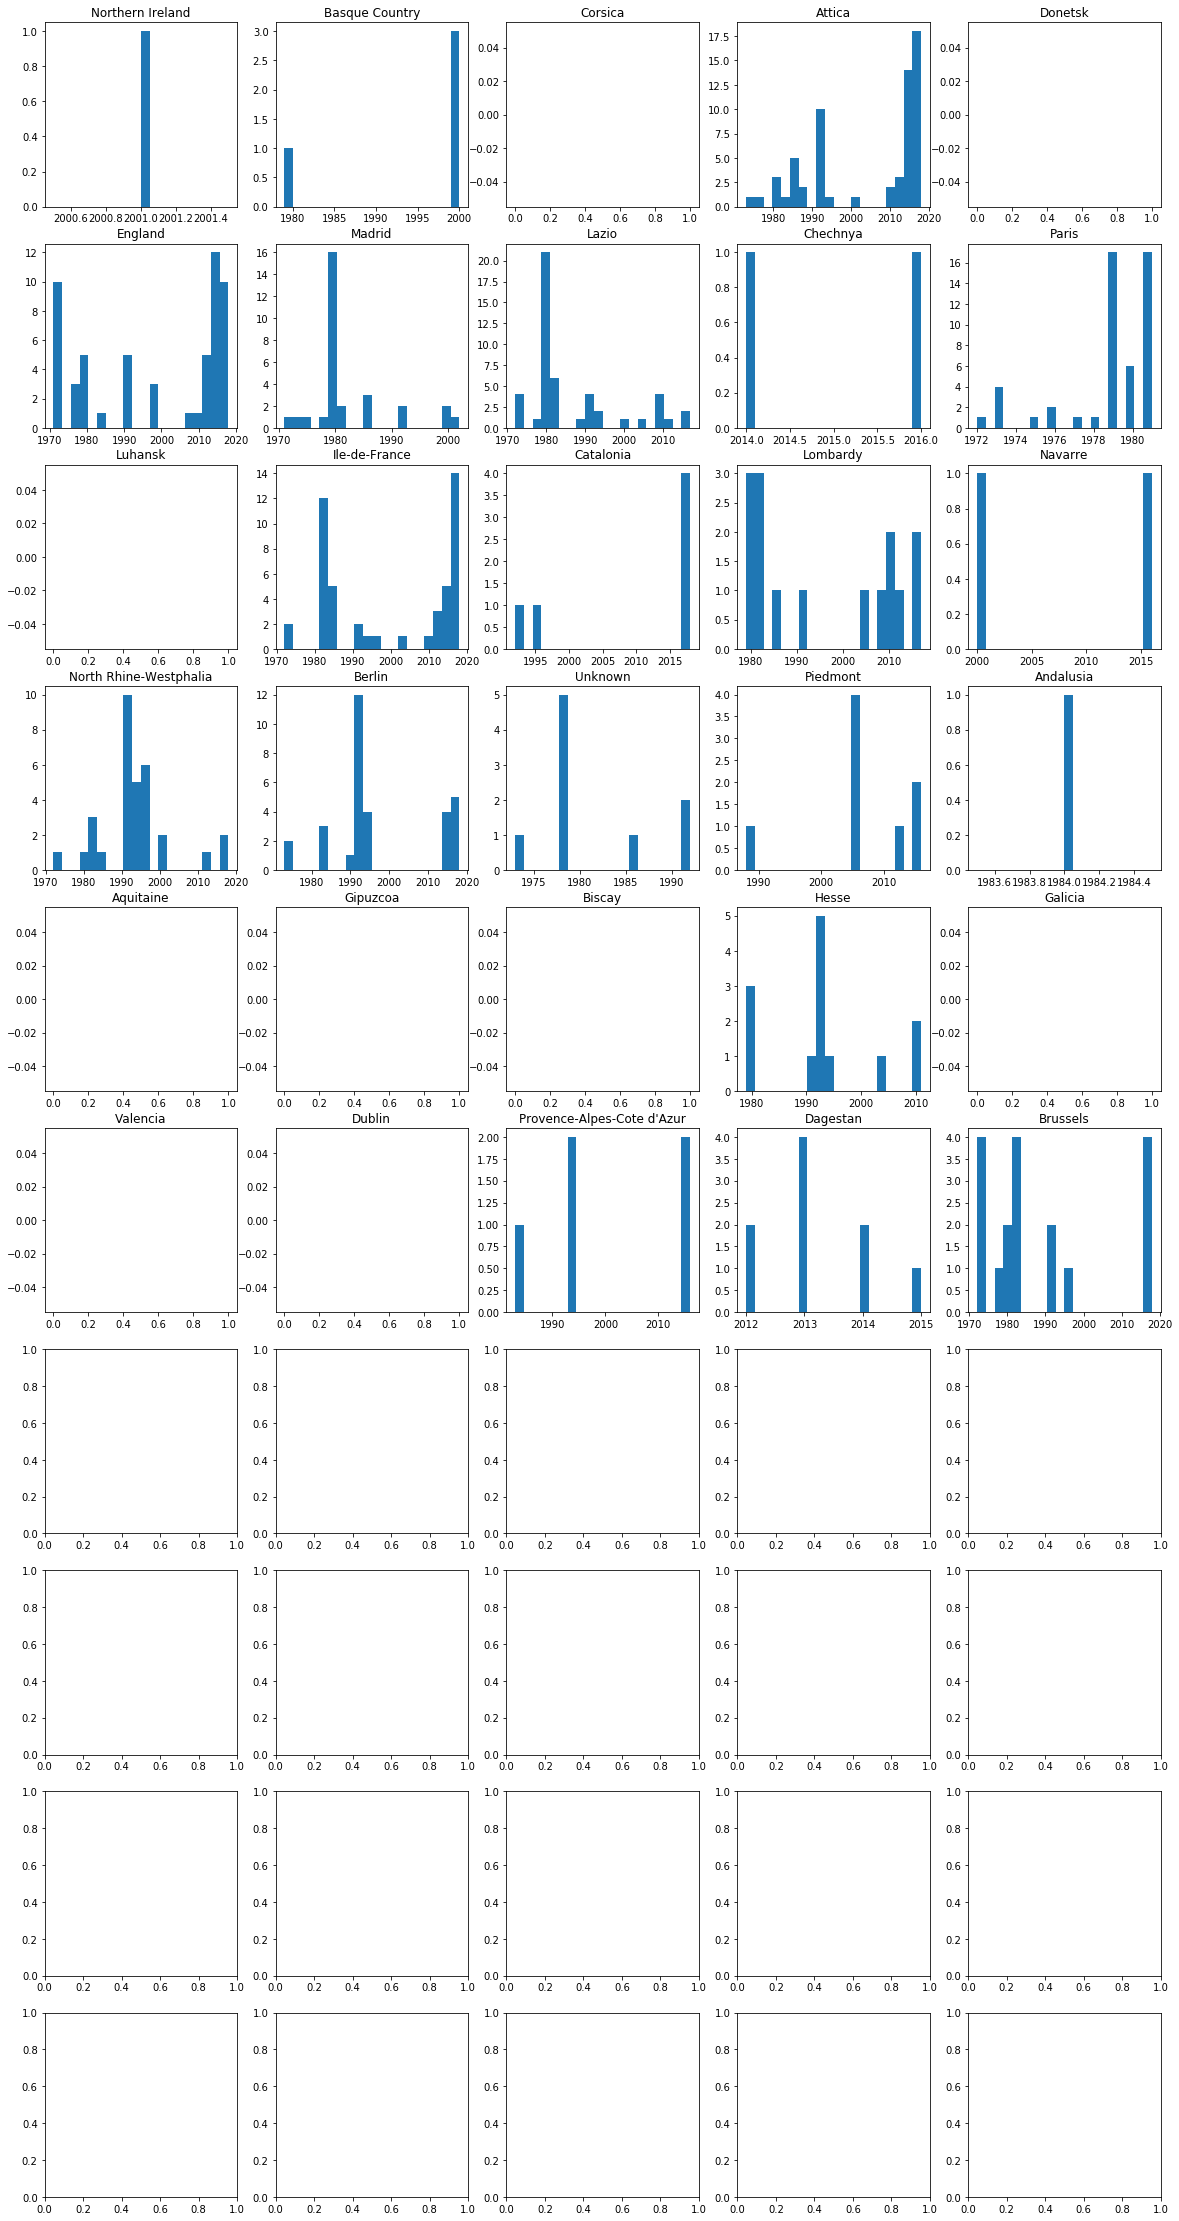

In [88]:
fig, axs = plt.subplots(10,5, figsize=(20, 40), facecolor='w', edgecolor='k')

for ax ,prov in zip(axs.ravel(),top30):
  df_grp[df_grp.provstate == prov].iyear.hist(ax=ax,grid=False,bins=20)
  ax.set_title(prov)

In [0]:
pollution = pd.read_csv('ada_europe_data/pollution_2016.csv')
env_satisfaction = pd.read_csv('ada_europe_data/env_satisfaction_2013.csv')
life_satisfaction = pd.read_csv('ada_europe_data/life_satisfaction_2013.csv')
politics = pd.read_csv('ada_europe_data/trust_in_politics_2013.csv')
income = pd.read_csv('ada_europe_data/median_income_2016.csv')
legal = pd.read_csv('ada_europe_data/trust_in_legal_2013.csv')
job_satisfaction = pd.read_csv('ada_europe_data/job_satisfaction_2013.csv')
budget = pd.read_csv('ada_europe_data/make_ends_meet_2016.csv')
crime = pd.read_csv('ada_europe_data/crime_2016.csv')
leisure_satisfaction = pd.read_csv('ada_europe_data/leisure_satisfaction_2013.csv')
underemployment = pd.read_csv('ada_europe_data/underemployment_2016.csv')
close_relations = pd.read_csv('ada_europe_data/close_relations_2015.csv')
low_savings = pd.read_csv('ada_europe_data/low_savings_2016.csv')
weather = pd.read_csv('ada_europe_data/weather.csv')
life_expectancy = pd.read_csv('ada_europe_data/life_expectancy_2016.csv')
unemployment = pd.read_csv('ada_europe_data/unemployment_2016.csv')
police = pd.read_csv('ada_europe_data/trust_in_police_2013.csv')
gdp = pd.read_csv('ada_europe_data/gdp_2016.csv')
health = pd.read_csv('ada_europe_data/perceived_health_2016.csv')
population = pd.read_csv('ada_europe_data/population_2011.csv')
work_hours = pd.read_csv('ada_europe_data/work_hours_2016.csv')

In [0]:
df_terror=df_grp[['country_txt','nkill','iyear','imonth']]

In [0]:
df_terror.rename(columns={'country_txt':'country'},inplace=True)

In [92]:
df_terror

,country,nkill,iyear,imonth
79,Spain,0.0,1971,8
142,United Kingdom,0.0,1971,12
346,Italy,0.0,1972,8
376,Belgium,0.0,1972,9
382,United Kingdom,1.0,1972,9
...,...,...,...,...
13197,Germany,0.0,2018,10
13198,Greece,0.0,2018,10
13202,Belgium,0.0,2018,11
13210,Germany,0.0,2018,12


In [0]:
df_terror=df_terror.loc[(df_terror['iyear']==2013)]

In [0]:
country=df_terror['country'].unique()

In [95]:
df_terror['nkill'].fillna(0)

11572    0.0
11595    1.0
11597    0.0
11598    0.0
11606    0.0
11607    0.0
11618    1.0
11619    0.0
11645    0.0
11646    0.0
11647    0.0
11653    0.0
Name: nkill, dtype: float64

In [96]:
nbatt=df_terror['country'].value_counts()
nbatt

Russia            4
United Kingdom    3
Italy             2
Greece            2
France            1
Name: country, dtype: int64

In [97]:
df_nbatt=pd.DataFrame(nbatt)
df_nbatt=df_nbatt.reset_index()
df_nbatt.rename(columns={'index': 'country', 'country': 'nAttacks'}, inplace=True)
df_nbatt

,country,nAttacks
0,Russia,4
1,United Kingdom,3
2,Italy,2
3,Greece,2
4,France,1


In [98]:
df_terror

,country,nkill,iyear,imonth
11572,United Kingdom,0.0,2013,1
11595,Russia,1.0,2013,3
11597,Greece,0.0,2013,3
11598,Greece,0.0,2013,3
11606,Italy,0.0,2013,4
11607,Italy,0.0,2013,4
11618,United Kingdom,1.0,2013,5
11619,France,0.0,2013,5
11645,Russia,0.0,2013,7
11646,Russia,0.0,2013,8


In [0]:
df_terror.insert(2,'kill_total',0)

In [0]:
for count in country:
  df_terror['kill_total'].loc[(df_terror['country']==count)] = df_terror['nkill'].loc[(df_terror['country']==count)].sum()


In [0]:
df_terror.drop(['iyear','imonth','nkill'],axis=1, inplace=True)

In [102]:
df_terror

,country,kill_total
11572,United Kingdom,1.0
11595,Russia,1.0
11597,Greece,0.0
11598,Greece,0.0
11606,Italy,0.0
11607,Italy,0.0
11618,United Kingdom,1.0
11619,France,0.0
11645,Russia,1.0
11646,Russia,1.0


In [0]:
df_terror=df_terror.drop_duplicates('country')

In [0]:
 df_terrfin=pd.merge(df_terror, df_nbatt,
                on = 'country')

In [105]:
# let's merge all the datasets on the country column.

x = pd.merge(pollution, env_satisfaction,
                on = 'country')
x1 = pd.merge(x, job_satisfaction,
              on = 'country')
x2 = pd.merge(x1, life_satisfaction,
              on = 'country')
x3 = pd.merge(x2, politics,
              on = 'country')
x4 = pd.merge(x3, income,
              on = 'country')
x5 = pd.merge(x4, legal,
              on = 'country')
x6 = pd.merge(x5, budget,
              on = 'country')
x7 = pd.merge(x6, crime,
              on = 'country')
x8 = pd.merge(x7, leisure_satisfaction,
              on = 'country')
x9 = pd.merge(x8, underemployment,
              on = 'country')
x10 = pd.merge(x9, close_relations,
               on = 'country')
x11 = pd.merge(x10, low_savings,
               on = 'country')
x12 = pd.merge(x11, weather,
               on = 'country')
x13 = pd.merge(x12, life_expectancy,
               on = 'country')
x14 = pd.merge(x13, unemployment,
               on = 'country')
x15 = pd.merge(x14, police,
               on = 'country')
x16 = pd.merge(x15, gdp,
               on = 'country')
x17 = pd.merge(x16, health,
               on = 'country')
x18 = pd.merge(x17, population,
               on = 'country')
x19 = pd.merge(x18, work_hours,
               on = 'country')
data = pd.merge(x19, df_terrfin,
               on = 'country')

# let's drop some of the useless columns present in the dataset
data = data.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
                 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
                  'Unnamed: 15', 'Unnamed: 16'], axis = 1)

data['political_trust_rating'] = data['political_trust_rating']*10
data['legal_trust_rating'] = data['legal_trust_rating']*10
data['unemp_rate'] = data['unemp_rate']*10
data['police_trust_rating'] = data['police_trust_rating']*10
data['total_pop'] = data['total_pop']/805550

# divinding the values of median income and gdp to get the values within the range of 100
# I have used the minimum and maximum values to get the normalized values between 0 and 100.
data['median_income'] = data['median_income']/287
data['gdp'] = data['gdp']/31600

# let's transpose and check the dataset
data = data.transpose()
data

,0,1,2,3
country,Greece,France,Italy,United Kingdom
prct_rpt_pollution,19.6,14.1,15.1,9
prct_env_satis_high,18.3,27.9,11,38.2
prct_env_satis_med,45.2,61.6,53.5,50.6
prct_env_satis_low,36.5,10.5,35.5,11.3
prct_job_satis_high,14,20,20.2,28
prct_job_satis_med,48.3,64.7,62.2,49.6
prct_job_satis_low,37.7,15.4,17.6,22.4
prct_life_satis_high,12.8,16.1,14.2,27.8
prct_life_satis_med,51.8,64.8,63,53.2


In [0]:
df = data.transpose()

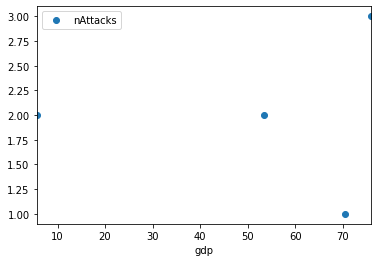

In [107]:
df.plot(x='gdp', y='nAttacks', style='o')

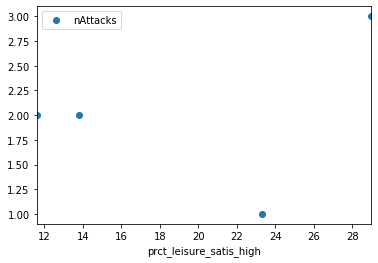

In [108]:
df.plot(x='prct_leisure_satis_high', y='nAttacks', style='o')

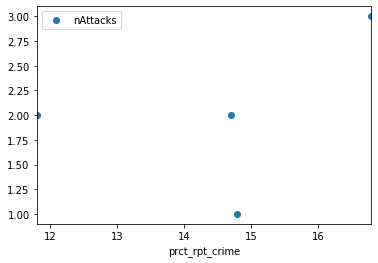

In [109]:
df.plot(x='prct_rpt_crime', y='nAttacks', style='o')

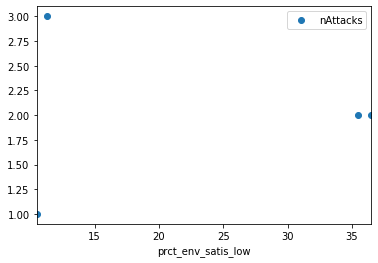

In [111]:
df.plot(x='prct_env_satis_low', y='nAttacks', style='o')

In [0]:
df_terror=df_grp2[['country_txt','nkill','iyear','imonth']]

In [0]:
df_terror.rename(columns={'country_txt':'country'},inplace=True)

In [114]:
df_terror

,country,nkill,iyear,imonth
651,Greece,5.0,1973,8
730,Italy,30.0,1973,12
854,Italy,8.0,1974,5
4484,France,1.0,1982,4
4662,Italy,1.0,1982,10
...,...,...,...,...
12925,Germany,12.0,2016,12
12942,Ukraine,19.0,2017,1
12973,United Kingdom,6.0,2017,3
13013,United Kingdom,11.0,2017,6


In [0]:
df_terror=df_terror.loc[(df_terror['iyear']==2013)]

In [0]:
country=df_terror['country'].unique()

In [117]:
df_terror['nkill'].fillna(0)

11617    4.0
11648    0.0
Name: nkill, dtype: float64

In [118]:
nbatt=df_terror['country'].value_counts()
nbatt

Russia            1
United Kingdom    1
Name: country, dtype: int64

In [119]:
df_nbatt=pd.DataFrame(nbatt)
df_nbatt=df_nbatt.reset_index()
df_nbatt.rename(columns={'index': 'country', 'country': 'nAttacks'}, inplace=True)
df_nbatt

,country,nAttacks
0,Russia,1
1,United Kingdom,1


In [0]:
df_terror.insert(2,'kill_total',0)

In [0]:
for count in country:
  df_terror['kill_total'].loc[(df_terror['country']==count)] = df_terror['nkill'].loc[(df_terror['country']==count)].sum()

In [0]:
df_terror.drop(['iyear','imonth','nkill'],axis=1, inplace=True)

In [0]:
df_terror=df_terror.drop_duplicates('country')

In [0]:
 df_terrfin=pd.merge(df_terror, df_nbatt,
                on = 'country')

In [125]:
data = pd.merge(x19, df_terrfin,
               on = 'country')

# let's drop some of the useless columns present in the dataset
data = data.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
                 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
                  'Unnamed: 15', 'Unnamed: 16'], axis = 1)

data['political_trust_rating'] = data['political_trust_rating']*10
data['legal_trust_rating'] = data['legal_trust_rating']*10
data['unemp_rate'] = data['unemp_rate']*10
data['police_trust_rating'] = data['police_trust_rating']*10
data['total_pop'] = data['total_pop']/805550

# divinding the values of median income and gdp to get the values within the range of 100
# I have used the minimum and maximum values to get the normalized values between 0 and 100.
data['median_income'] = data['median_income']/287
data['gdp'] = data['gdp']/31600

# let's transpose and check the dataset
data = data.transpose()
data

,0
country,United Kingdom
prct_rpt_pollution,9
prct_env_satis_high,38.2
prct_env_satis_med,50.6
prct_env_satis_low,11.3
prct_job_satis_high,28
prct_job_satis_med,49.6
prct_job_satis_low,22.4
prct_life_satis_high,27.8
prct_life_satis_med,53.2


In [0]:
df = data.transpose()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 76.05641139240507 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


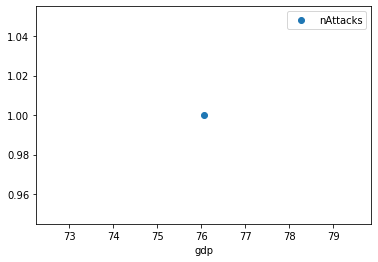

In [127]:
df.plot(x='gdp', y='nAttacks', style='o')

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 29.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


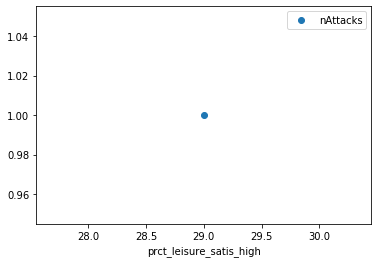

In [128]:
df.plot(x='prct_leisure_satis_high', y='nAttacks', style='o')

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 16.8 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


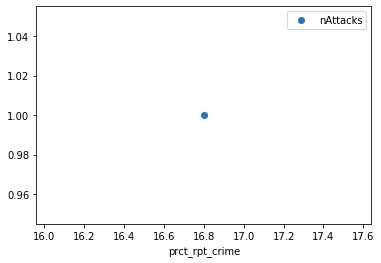

In [129]:
df.plot(x='prct_rpt_crime', y='nAttacks', style='o')

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 11.3 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


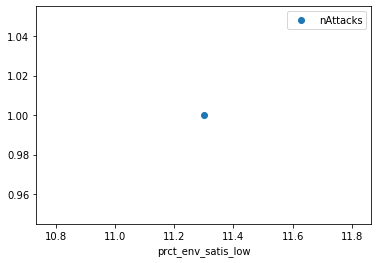

In [130]:
df.plot(x='prct_env_satis_low', y='nAttacks', style='o')